Minimum cost network flow prolem:  Network Simplex algorithm -- a variant of the simplex algorithm that operates directly on the network structure of the graph.   
  
It maintains a spanning tree of the residual network and iteratively updates the flow along the tree until an optimal solution is found. In each iteration, the algorithm computes reduced costs for each edge in the graph and identifies a new edge to add to the spanning tree. 

In [12]:
import networkx as nx

# Create a directed graph with capacity and cost attributes for each edge
G = nx.DiGraph()

# Add nodes to the graph
G.add_node('source')
G.add_node('destination')
G.add_node('node1')
G.add_node('node2')

# Add edges to the graph with capacity and cost attributes
G.add_edge('source', 'node1', capacity=10, weight=4)
G.add_edge('source', 'node2', capacity=20, weight=2)
G.add_edge('node1', 'node2', capacity=5, weight=1)
G.add_edge('node1', 'destination', capacity=15, weight=3)
G.add_edge('node2', 'destination', capacity=15, weight=2)

# Find the minimum cost flow from the source to the destination
flowDict = nx.min_cost_flow(G)

# Print the flow and cost
print("Flow: ", flowDict)
print("Cost: ", nx.cost_of_flow(G, flowDict))

Flow:  {'source': {'node1': 0, 'node2': 0}, 'destination': {}, 'node1': {'node2': 0, 'destination': 0}, 'node2': {'destination': 0}}
Cost:  0


Maximum flow problem： Edmonds-Karp algorithm -- a variant of the Ford-Fulkerson algorithm that uses breadth-first search (BFS) to find an augmenting path in each iteration of the algorithm.  
  
An augmenting path is a path from the source node to the destination node that has residual capacity on each edge. The algorithm iteratively increases the flow along the augmenting path until no more augmenting paths can be found.

In [13]:
import networkx as nx

# Create a directed graph with capacity attributes for each edge
G = nx.DiGraph()

# Add nodes to the graph
G.add_node('source')
G.add_node('destination')
G.add_node('node1')
G.add_node('node2')

# Add edges to the graph with capacity attributes
G.add_edge('source', 'node1', capacity=10)
G.add_edge('source', 'node2', capacity=20)
G.add_edge('node1', 'node2', capacity=5)
G.add_edge('node1', 'destination', capacity=15)
G.add_edge('node2', 'destination', capacity=15)

# Find the maximum flow from the source to the destination
flow_value, flow_dict = nx.maximum_flow(G, 'source', 'destination')

# Print the maximum flow and the flow values for each edge
print("Maximum flow:", flow_value)
print("Flow values:", flow_dict)

Maximum flow: 25
Flow values: {'source': {'node1': 10, 'node2': 15}, 'destination': {}, 'node1': {'node2': 0, 'destination': 10}, 'node2': {'destination': 15}}


Maximum flow problem： Ford-Fulkerson -- It uses DFS to search for augmentation paths and updates the network's traffic at each step  

In [7]:
from collections import defaultdict

class Graph:
    def __init__(self, vertices):
        self.graph = defaultdict(dict) # 用 defaultdict 来创建一个空的图，每个顶点连接的边是一个字典
        self.vertices = vertices # 所有顶点的列表
        
    def add_edge(self, u, v, w):
        self.graph[u][v] = w # 添加一条 u 到 v 的权值为 w 的边

    def dfs(self, graph, u, t, visited, path):
        visited[u] = True # 将 u 标记为已访问
        path.append(u) # 将 u 加入到路径中
        if u == t: # 如果已经到达汇点 t，返回该路径
            return path
        for v in graph[u]: # 遍历 u 的所有相邻节点 v
            if not visited[v] and graph[u][v] > 0: # 如果 v 没有被访问过并且 u 到 v 的边有剩余容量
                res = self.dfs(graph, v, t, visited, path) # 递归调用 dfs 函数  Depth-First Search
                if res:
                    return res # 如果找到一条路径，返回该路径
        path.pop() # 如果没有找到任何路径，则从路径中删除 u
        return None

    def max_flow(self, source, sink):
        flow = 0 # 初始流量为 0
        while True:
            visited = {v: False for v in self.vertices} # 初始化所有顶点的访问状态
            path = self.dfs(self.graph, source, sink, visited, []) # 在残留图上查找一条增广路径
            if not path: # 如果没有找到任何增广路径，结束循环
                break
            min_capacity = float("inf") # 将最小容量设置为正无穷大
            for u, v in zip(path, path[1:]): # 计算增广路径中的最小容量
                min_capacity = min(min_capacity, self.graph[u][v])
            for u, v in zip(path, path[1:]): # 在增广路径上更新残留网络的容量
                self.graph[u][v] -= min_capacity # u 到 v 的边减去最小容量
                self.graph[v][u] += min_capacity # v 到 u 的边加上最小容量
            flow += min_capacity # 将最小容量加入总流量
        return flow # 返回总流量

In [8]:
g = Graph(['A', 'B', 'C', 'D', 'E'])
g.add_edge('A', 'B', 3)
g.add_edge('A', 'D', 2)
g.add_edge('B', 'C', 4)
g.add_edge('C', 'A', 2)
g.add_edge('C', 'D', 1)
g.add_edge('C', 'E', 2)
g.add_edge('D', 'E', 3)

In [11]:
g.max_flow('A','B')

KeyError: 'A'

In [ ]:
print(g.max_flow('A', 'E')) # Output: 5

Traffic Capacity Modelling: A Greenshields model, which assumes a linear relationship between traffic flow rate and density.  

Here's an example Python code snippet that uses the Greenshields model to simulate traffic flow on a highway:  

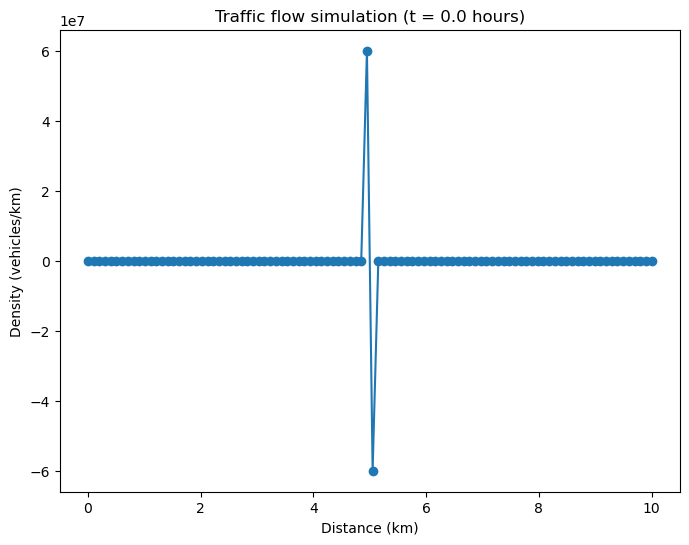

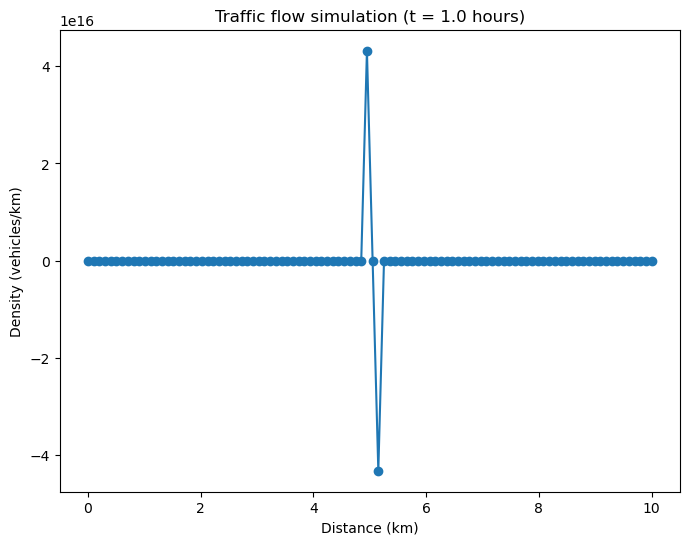

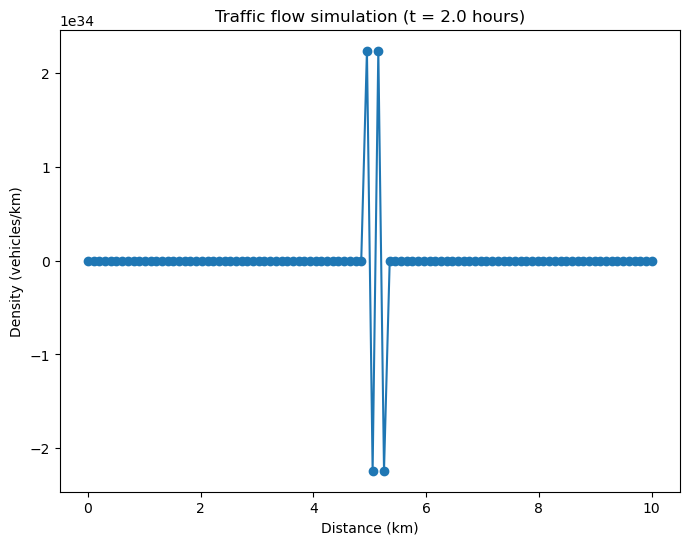

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
L = 10  # Length of the highway (in km)
v_max = 120  # Maximum speed (in km/h)
rho_max = 100  # Maximum density (in vehicles/km)
q_max = v_max * rho_max  # Maximum flow rate (in vehicles/h)
T = 1  # Simulation time step (in hours)
N = 100  # Number of cells
dx = L / N  # Cell length (in km)

# Initial conditions
rho = np.zeros(N)
rho[int(N/4):int(N/2)] = rho_max/2

# Simulation
for t in np.arange(0, 3, T):
    q = v_max * rho * (1 - rho / rho_max)
    q[:-1] = np.minimum(q[:-1], q_max * np.diff(rho) / dx)
    rho[1:] -= np.diff(q) / dx * T

    # Boundary conditions
    rho[0] = rho[-1]

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.plot(np.linspace(0, L, N), rho, 'o-')
    plt.xlabel('Distance (km)')
    plt.ylabel('Density (vehicles/km)')
    plt.title('Traffic flow simulation (t = {:.1f} hours)'.format(t))
    plt.show()